In [45]:
import pandas as pd
import matplotlib.pyplot as plt


# ***`REPORTE DE ANALISIS I `***

# **Importando base de datos**

In [3]:
datos = pd.read_csv('alquiler.csv', sep=';')


In [4]:
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0


# **Analizando base de datos**


In [5]:
datos.dtypes

Tipo              object
Distrito          object
Cuartos            int64
Vacantes           int64
Suites             int64
Area               int64
Valor            float64
Mantenimiento    float64
Impuesto         float64
dtype: object

In [6]:
# Nombramos las columnas del DataFrame
tipo_datos = pd.DataFrame(datos.dtypes, columns =['Tipo de datos'])
tipo_datos.columns.name='Variables'
tipo_datos

Variables,Tipo de datos
Tipo,object
Distrito,object
Cuartos,int64
Vacantes,int64
Suites,int64
Area,int64
Valor,float64
Mantenimiento,float64
Impuesto,float64


In [7]:
print(f'La base de datos cuenta con {datos.shape[0]} registros (inmuebles) y {datos.shape[1]} variables')

La base de datos cuenta con 32960 registros (inmuebles) y 9 variables


# **Eliminando duplicados**

In [8]:
# Tomamos la columna de tipo de inmueble y eliminamos los duplicados
tipo_inmueble = datos['Tipo']
tipo_inmueble.drop_duplicates(inplace= True)
type(tipo_inmueble)

pandas.core.series.Series

# ***Visualizando los inmuebles en un DataFrame***

In [9]:
# Lo convertimos en un dataframe ya que era una serie, para poder empezar a trabajar en el
tipo_inmueble =pd.DataFrame(tipo_inmueble)
tipo_inmueble.index= range(tipo_inmueble.shape[0])
tipo_inmueble.columns.name = 'id'
tipo_inmueble

id,Tipo
0,Habitación
1,Casa
2,Local comercial
3,Departamento
4,Casa en condominio
5,Edificio completo
6,Flat
7,Tienda/Salón
8,Almacén
9,Casa comercial


# ***Inmuebles residenciales***

In [10]:
list(datos['Tipo'].drop_duplicates())

['Habitación',
 'Casa',
 'Local comercial',
 'Departamento',
 'Casa en condominio',
 'Edificio completo',
 'Flat',
 'Tienda/Salón',
 'Almacén',
 'Casa comercial',
 'Casa de villa',
 'Terreno',
 'Cochera',
 'Loft',
 'Tienda en Centro Comercial',
 'Chacra',
 'Terreno em condominio',
 'Oficina',
 'Chalet',
 'Studio',
 'Hotel',
 'Local industrial']

In [11]:
residencial = ['Habitación',
 'Casa',
 'Departamento',
 'Casa en condominio',
 'Casa comercial',
 'Casa de villa',
]
residencial

['Habitación',
 'Casa',
 'Departamento',
 'Casa en condominio',
 'Casa comercial',
 'Casa de villa']

In [12]:
#mostramos los primeros 10 datos
datos.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Local comercial,Ate,0,4,0,150,5200.0,4020.0,1111.0
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
6,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
7,Casa en condominio,Ate,5,4,5,750,22000.0,NaN,NaN
8,Casa en condominio,El Agustino,2,2,0,65,1000.0,NaN,NaN
9,Local comercial,Pachacámac,0,3,0,695,35000.0,19193.0,3030.0


In [13]:

seleccion = datos['Tipo'].isin(residencial)
seleccion

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [14]:
datos_residencial = datos[seleccion]
datos_residencial

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
3,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
4,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
5,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
32955,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
32956,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
32957,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [15]:
#reorganizamos los indices
datos_residencial.index = range(datos_residencial.shape[0])
datos_residencial

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


Exportando base de datos

In [16]:
datos_residencial.to_csv('alquiler_residencial.csv', sep=';', index = False)

In [17]:
datos_residencial_2 = pd.read_csv('alquiler_residencial.csv',sep=';')
datos_residencial_2

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


Frecuencia

In [18]:
# frecuencia de Departamentos de tipo residencial
seleccion_departamento = datos_residencial_2['Tipo'] == 'Departamento'
frecuencia_dpto = datos_residencial_2[seleccion_departamento].shape[0]
frecuencia_dpto

19532

In [19]:
# frecuencia de Casa, Casa codominio, Casa de villa de tipo residencial
seleccion = (datos_residencial_2['Tipo'] == 'Casa') | (datos_residencial_2['Tipo'] == 'Casa en condominio') | (datos_residencial_2['Tipo'] == 'Casa de villa')
frecuencia = datos_residencial_2[seleccion].shape[0]
frecuencia

2212

# ***Tratamiento de datos faltantes***

In [20]:
datos_residencial_2

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [21]:
datos_residencial_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22845 entries, 0 to 22844
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           22845 non-null  object 
 1   Distrito       22845 non-null  object 
 2   Cuartos        22845 non-null  int64  
 3   Vacantes       22845 non-null  int64  
 4   Suites         22845 non-null  int64  
 5   Area           22845 non-null  int64  
 6   Valor          22836 non-null  float64
 7   Mantenimiento  20796 non-null  float64
 8   Impuesto       15976 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.6+ MB


In [22]:
# Vemos los datos que son nulos en la columna 'Valor'
datos_sin_nulos = datos_residencial_2[datos_residencial_2['Valor'].isnull()]
datos_sin_nulos

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
58,Departamento,Ate,2,1,1,70,NaN,970.0,68.0
1515,Departamento,San Bartolo,2,0,0,75,NaN,878.0,NaN
1708,Casa,Lince,3,4,3,363,NaN,NaN,NaN
2039,Departamento,Chorrillos,2,0,0,95,NaN,1010.0,170.0
2061,Departamento,San Borja,2,0,0,72,NaN,850.0,NaN
4998,Casa,Lince,3,2,1,100,NaN,NaN,NaN
8674,Departamento,San Bartolo,2,0,1,75,NaN,878.0,NaN
9061,Departamento,La Punta,3,0,1,135,NaN,910.0,228.0
9264,Departamento,La Perla,3,1,1,105,NaN,880.0,221.0


In [23]:
#Eliminamos los nueve datos NaN de la columna valor
datos_residencial_2.dropna(subset='Valor', inplace=True)
datos_residencial_2

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
4,Departamento,Barranco,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [24]:
# Eliminar si el tipo es 'Departamento' y el 'Mantenimiento' es nulo
seleccion = (datos_residencial_2['Mantenimiento'].isnull()) & (datos_residencial_2['Tipo'] == 'Departamento')
datos_residencial_2 = datos_residencial_2[~seleccion]
datos_residencial_2

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,NaN,NaN
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,NaN
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [25]:
# A los datos nulos los rellenamos con ceros
datos_residencial_2 = datos_residencial_2.fillna({'Mantenimiento':0,'Impuesto':0})
datos_residencial_2

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0
5,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
22840,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22841,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22842,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22843,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [26]:
datos_residencial_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22091 entries, 0 to 22844
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           22091 non-null  object 
 1   Distrito       22091 non-null  object 
 2   Cuartos        22091 non-null  int64  
 3   Vacantes       22091 non-null  int64  
 4   Suites         22091 non-null  int64  
 5   Area           22091 non-null  int64  
 6   Valor          22091 non-null  float64
 7   Mantenimiento  22091 non-null  float64
 8   Impuesto       22091 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [27]:
datos_residencial_2.to_csv('alquiler_residencial.csv', sep=';', index = False)

# ***Agregando variables***

In [28]:
alquileres = pd.read_csv('alquiler_residencial.csv', sep=';')
alquileres

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0
...,...,...,...,...,...,...,...,...,...
22086,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0
22087,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0
22088,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0
22089,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0


In [29]:
# Agregamos el valor bruto
alquileres['Valor Bruto'] = (alquileres['Valor'])+ (alquileres['Mantenimiento']) +(alquileres['Impuesto'])
alquileres.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,22000.0
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,1000.0
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,2216.0
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,1969.0
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,2611.0


In [30]:
# Valor por metro cuadrado
alquileres['Valor m2'] = ((alquileres['Valor']) / (alquileres['Area'])).round(2)
alquileres.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00


In [31]:
# Valor bruto por m2
alquileres['Valor Bruto por m2'] = ((alquileres['Valor Bruto']) / (alquileres['Valor m2'])).round(2)
alquileres.head(10)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2,Valor Bruto por m2
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,53.18
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,100.00
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,22.69
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,61.79
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,62.23
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,750.09
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,65.02
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,103.41
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,118.12
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,52.22


In [32]:
casa = ['Casa','Casa en condominio', 'Casa de Villa']

In [33]:
# Tipo agrepado: Si tiene la palabra 'Casa' se pone casa sino despartamento
alquileres['Tipo Agrupado'] = alquileres['Tipo'].apply(lambda x : 'Casa' if x in casa else 'Departamento')
alquileres.head(20)

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor Bruto,Valor m2,Valor Bruto por m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,53.18,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,100.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,22.69,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,61.79,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,62.23,Departamento
5,Casa en condominio,Ate,5,4,5,750,22000.0,0.0,0.0,22000.0,29.33,750.09,Casa
6,Casa en condominio,El Agustino,2,2,0,65,1000.0,0.0,0.0,1000.0,15.38,65.02,Casa
7,Departamento,Mi Perú,2,1,0,70,1500.0,642.0,74.0,2216.0,21.43,103.41,Departamento
8,Departamento,San Borja,3,1,1,90,1500.0,455.0,14.0,1969.0,16.67,118.12,Departamento
9,Departamento,San Borja,1,0,1,40,2000.0,561.0,50.0,2611.0,50.00,52.22,Departamento


In [34]:
# Eliminamos columna Valor Bruto, Valor Bruto por m2
alquileres.drop(['Valor Bruto','Valor Bruto por m2'], axis = 1, inplace = True)
alquileres

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
22086,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0,12.86,Departamento
22087,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0,29.63,Departamento
22088,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0,23.08,Departamento
22089,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0,29.17,Departamento


In [50]:
alquileres.to_csv('alquiler_residencial.csv', sep = ';',index=False)

# ***Agrupacion y estadisticas descriptivas***

In [51]:
info = pd.read_csv('alquiler_residencial.csv', sep = ';')

In [52]:
info

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
0,Habitación,San Borja,1,0,0,40,1700.0,500.0,60.0,42.50,Departamento
1,Casa,Lurigancho,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Departamento,Pachacámac,1,0,0,15,800.0,390.0,20.0,53.33,Departamento
3,Departamento,Ate,1,0,0,48,800.0,230.0,0.0,16.67,Departamento
4,Departamento,Comas,2,0,0,50,1300.0,301.0,17.0,26.00,Departamento
...,...,...,...,...,...,...,...,...,...,...,...
22086,Departamento,Santa Anita,2,0,0,70,900.0,490.0,48.0,12.86,Departamento
22087,Habitación,Pachacámac,0,0,0,27,800.0,350.0,25.0,29.63,Departamento
22088,Departamento,Lince,3,1,2,78,1800.0,800.0,40.0,23.08,Departamento
22089,Departamento,Rímac,2,1,0,48,1400.0,509.0,37.0,29.17,Departamento


In [53]:
barrios = ['Ate', 'Barranco', 'Comas','Lince','El Agustino','San Luis','Callao']

In [54]:
seleccion = info['Distrito'].isin(barrios)
info = info[seleccion]

In [55]:
info['Distrito'].drop_duplicates()

3              Ate
4            Comas
6      El Agustino
12        San Luis
13          Callao
22           Lince
174       Barranco
Name: Distrito, dtype: object

In [56]:
grupo_barrio = info.groupby('Distrito')
type(grupo_barrio)

pandas.core.groupby.generic.DataFrameGroupBy

In [57]:
grupo_barrio.groups

{'Ate': [3, 5, 14, 16, 21, 30, 32, 35, 42, 43, 61, 62, 63, 65, 69, 75, 80, 82, 94, 108, 111, 113, 118, 131, 133, 137, 152, 155, 157, 167, 168, 175, 188, 191, 210, 217, 224, 227, 236, 239, 242, 247, 262, 268, 277, 279, 294, 295, 296, 298, 305, 311, 314, 329, 339, 340, 349, 364, 370, 372, 378, 384, 391, 393, 404, 416, 436, 437, 439, 440, 443, 453, 456, 467, 468, 470, 478, 481, 489, 500, 506, 509, 517, 523, 543, 544, 545, 546, 549, 553, 558, 560, 561, 562, 592, 595, 596, 598, 602, 604, ...], 'Barranco': [174, 1043, 1178, 1696, 2019, 2104, 2655, 3015, 3306, 3724, 4796, 4837, 5535, 6515, 7826, 9170, 9638, 9679, 9976, 10227, 10944, 11176, 11496, 11607, 11836, 12265, 12332, 12346, 12906, 13528, 13615, 14462, 15220, 16226, 16519, 17980, 18917, 18970, 19011, 19737, 21135, 21164, 21183, 21184, 21574, 21619, 21785], 'Callao': [13, 59, 84, 107, 124, 136, 158, 165, 190, 207, 225, 274, 308, 309, 350, 387, 460, 497, 539, 613, 698, 710, 794, 826, 876, 897, 986, 1121, 1125, 1377, 1468, 1524, 1552, 1556

In [58]:
# Calculamos la media de cada Distrito
# for barrio,data in grupo_barrio:
#     print(f'{barrio} ---> {(data.Valor.mean()).round(2)}')
grupo_barrio['Valor'].mean().round(2)

Distrito
Ate            6960.98
Barranco       1403.83
Callao         4915.28
Comas          8823.80
El Agustino    1152.67
Lince          1736.10
San Luis       1980.73
Name: Valor, dtype: float64

In [59]:
grupo_barrio['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Distrito,,,,,,,,
Ate,3960.0,6960.98,11806.44,560.0,2500.0,4300.0,8500.0,600000.0
Barranco,47.0,1403.83,1496.62,450.0,800.0,1100.0,1200.0,8000.0
Callao,483.0,4915.28,44046.80,500.0,1200.0,1700.0,2250.0,800000.0
Comas,1942.0,8823.80,8651.78,400.0,3800.0,6500.0,10000.0,100000.0
El Agustino,118.0,1152.67,750.33,500.0,800.0,1000.0,1200.0,5500.0
Lince,704.0,1736.10,2597.55,300.0,850.0,1200.0,1800.0,45000.0
San Luis,385.0,1980.73,2751.22,500.0,1000.0,1400.0,2000.0,45000.0


Text(0.5, 1.0, 'Valor medio de alquiler por Dstrito')

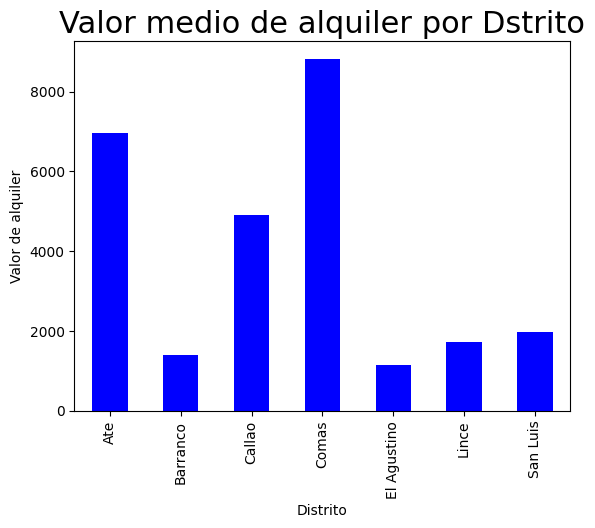

In [60]:
# Graficamos
fig = grupo_barrio['Valor'].mean().plot.bar(color = 'blue')
fig.set_ylabel('Valor de alquiler')
fig.set_title('Valor medio de alquiler por Dstrito',{'fontsize':22})

# ***Identificando y excluyendo Ourliers***

<Axes: >

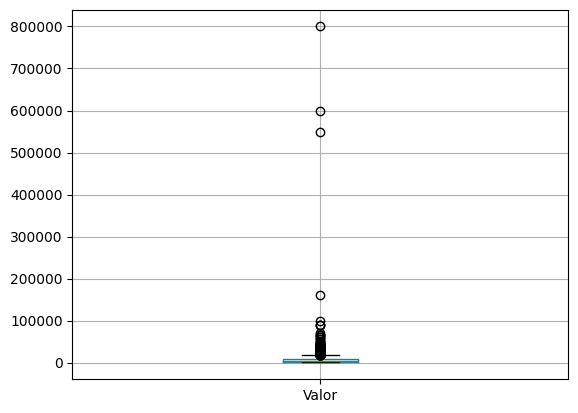

In [62]:
#Utilizamos Box-Plot
info.boxplot(['Valor'])

In [64]:
info[info['Valor']>= 500000]

,Tipo,Distrito,Cuartos,Vacantes,Suites,Area,Valor,Mantenimiento,Impuesto,Valor m2,Tipo Agrupado
7731,Departamento,Ate,1,1,0,65,600000.0,980.0,120.0,9230.77,Departamento
10774,Casa en condominio,Callao,4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12822,Departamento,Callao,2,2,1,150,550000.0,850.0,150.0,3666.67,Departamento


In [65]:
valor =info['Valor']
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 -Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [66]:
seleccion = ((valor >= limite_inferior) & (valor <= limite_superior))

In [67]:
datos_new = info[seleccion]

<Axes: >

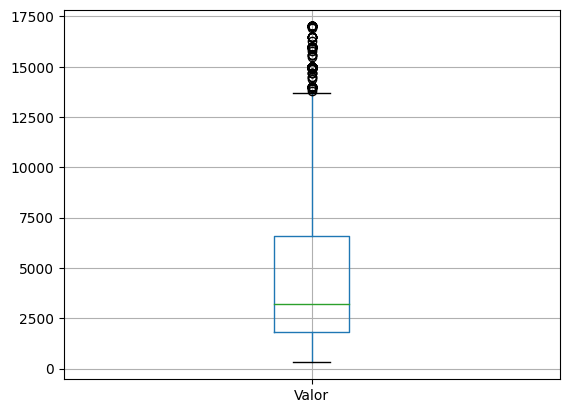

In [68]:
datos_new.boxplot(['Valor'])